In [9]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt 

In [10]:
x, y = make_classification(n_samples = 9000, n_features=18, n_informative = 4, n_redundant = 12, random_state=4)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [12]:
train_scores, test_scores = list(), list()

In [13]:
values = [i for i in range(1,21)]

In [14]:
for i in values:
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(x_train, y_train)
    train_yhat = model.predict(x_train)
    train_acc = accuracy_score(y_train, train_yhat)
    test_yhat = model.predict(x_test)
    test_acc = accuracy_score(y_test, test_yhat)
    train_scores.append(train_acc)
    test_scores.append(test_acc)
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

>1, train: 0.832, test: 0.844
>2, train: 0.846, test: 0.857
>3, train: 0.880, test: 0.885
>4, train: 0.903, test: 0.907
>5, train: 0.924, test: 0.920
>6, train: 0.930, test: 0.923
>7, train: 0.950, test: 0.930
>8, train: 0.955, test: 0.933
>9, train: 0.968, test: 0.937
>10, train: 0.973, test: 0.941
>11, train: 0.980, test: 0.941
>12, train: 0.984, test: 0.941
>13, train: 0.987, test: 0.943
>14, train: 0.989, test: 0.943
>15, train: 0.992, test: 0.939
>16, train: 0.994, test: 0.943
>17, train: 0.996, test: 0.943
>18, train: 0.997, test: 0.942
>19, train: 0.999, test: 0.943
>20, train: 0.999, test: 0.943


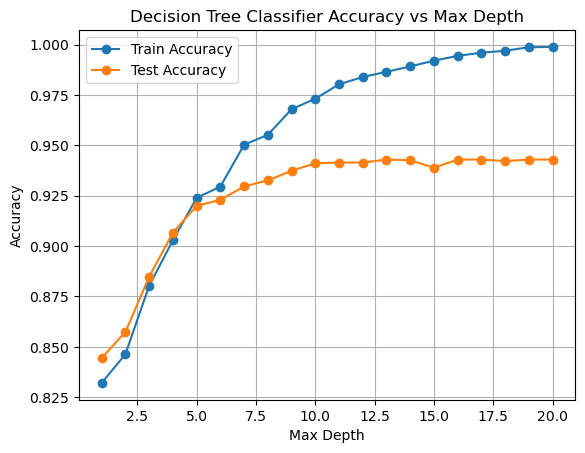

In [15]:
plt.plot(values, train_scores, '-o', label='Train Accuracy')
plt.plot(values, test_scores, '-o', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy vs Max Depth')
plt.legend()
plt.grid()
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

In [19]:
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth':[2, 4, 6, 10, 20], 'min_samples_split':[5, 10, 20, 50, 100]}
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, n_jobs = -1, scoring = "accuracy")
clf.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [20]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

In [21]:
print(accuracy_score(y_train, clf.best_estimator_.predict(x_train)))
print(accuracy_score(y_test, clf.best_estimator_.predict(x_test)))

0.9703174603174604
0.9392592592592592
